<a href="https://colab.research.google.com/github/bflatts/UCDPA_BrianFlaherty/blob/main/BrianFlaherty_NASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NASA Exoplants

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Variables
DIR = '/content/drive/MyDrive/Colab Notebooks/'
FILENAME = DIR + 'cleaned_5250.csv'

In [ ]:
# Reading file
data = pd.read_csv(FILENAME, header = 0)


In [ ]:
# Sorting
number_to_print = 5

print(f'The furtheset {number_to_print} exoplanets from the sun are:')          #Prints a note
farthest_from_sun = data.sort_values('distance', ascending=False )              #sorts the dataset by distance
print(farthest_from_sun[['name']].head(number_to_print).to_string(index=False)) #prints out the first number of names



The furtheset 5 exoplanets from the sun are:
                 name
           SWEEPS-4 b
          SWEEPS-11 b
 KMT-2021-BLG-1077L b
 KMT-2021-BLG-1077L c
OGLE-2015-BLG-0051L b


In [ ]:
# Indexing
data_ind = data.set_index('name')                                               #Set the name column as the dataset index
print(data_ind[['distance','planet_type']].head())                              #print the distance and planet_type, noting the index is now name

                      distance planet_type
name                                      
11 Comae Berenices b     304.0   Gas Giant
11 Ursae Minoris b       409.0   Gas Giant
14 Andromedae b          246.0   Gas Giant
14 Herculis b             58.0   Gas Giant
16 Cygni B b              69.0   Gas Giant


In [ ]:
# Grouping
print('Table showing smallest, largest, and avergage planet size per planet type')#Prints a note
data.groupby('planet_type')['radius_multiplier'].agg(['min', 'max', 'mean'])    #Group the data by planet_type and aggregate the min, max and mean for the radius multiplier

Table showing smallest, largest, and avergage planet size per planet type


,min,max,mean
planet_type,,,
Gas Giant,0.225,6.900,1.160728
Neptune-like,0.200,2.233,0.493737
Super Earth,0.201,2.230,1.487342
Terrestrial,0.259,1.800,0.824062
Unknown,NaN,NaN,NaN


In [ ]:
# Checking for duplication and missing values
missing = data[['name']].isnull().sum().to_string(index=False)                  # counts the cells in name that are null, and converts them to string
duplicate = len(data['name'])-len(data['name'].drop_duplicates())               # counts the duplicates in name column

# Print message
print('there are: ' + missing + ' missing names' )                              #Prints a note with results
print('there are: ' + str(duplicate) + ' duplicated names' )                    #Prints a note with results



there are: 0 missing names
there are: 0 duplicated names


In [ ]:
# Split data (all entries discovered before 2000)
data_before_2000 = data[data['discovery_year'] < 2000]

# Split data (all entries discovered after 1999)
data_after_1999 = data[data['discovery_year'] > 1999]

print(str(data_before_2000.shape)+'   <- before 2000')
print(str(data_after_1999.shape)+' <- after 1999')
print(str(data.shape)+ ' <- original')

# Merge the split parts
data_merge = data_after_1999.merge(data_before_2000, on='name', how='left', suffixes=('_aft99', '_bfr2000'))

print(str(data_merge.shape)+' <- merged')

# Concatenate the split parts
data_concat = pd.concat([data_before_2000,data_after_1999])
print(str(data_concat.shape)+' <- concatenated')

(30, 13)   <- before 2000
(5220, 13) <- after 1999
(5250, 13) <- original
(5220, 25) <- merged
(5250, 13) <- concatenated


In [ ]:
# Count planets discovered each year
data['discovery_year'].value_counts()

2016    1517
2014     875
2021     525
2022     338
2018     326
2020     234
2019     203
2015     157
2017     153
2012     138
2011     138
2013     126
2010      97
2009      94
2008      65
2007      52
2005      36
2006      31
2002      29
2004      27
2003      22
2000      16
1999      13
2001      12
2023       9
1996       6
1998       6
1992       2
1995       1
1994       1
1997       1
Name: discovery_year, dtype: int64

<AxesSubplot:>

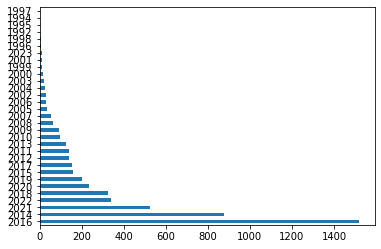

In [ ]:
# Plot the above info
#(Plot: Count of planets discovered each year)
data['discovery_year'].value_counts().plot(kind='barh')

In [ ]:
# As 2016 has substantially more planets discovered, lets check it out
discovered2016 = data['discovery_year'] == 2016
data['detection_method'][discovered2016].value_counts()

Transit                        1453
Radial Velocity                  50
Gravitational Microlensing       10
Direct Imaging                    2
Transit Timing Variations         1
Pulsation Timing Variations       1
Name: detection_method, dtype: int64

<AxesSubplot:>

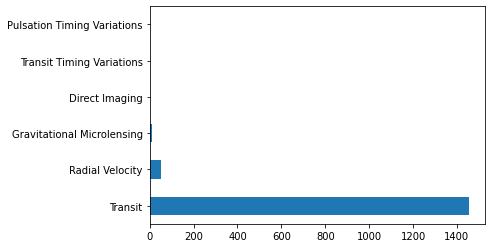

In [ ]:
# Plot the above info
#(Plot: Count of planets discovered by each detection method in 2016)
data['detection_method'][discovered2016].value_counts().plot(kind='barh')

<AxesSubplot:>

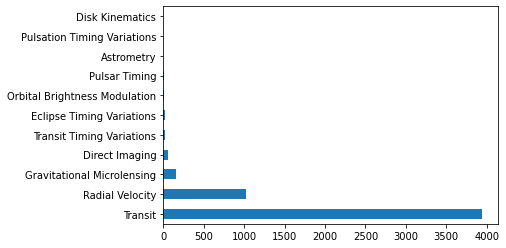

In [ ]:
# Plot the above info
#(Plot: Count of all planets discovered by each detection method)
data['detection_method'].value_counts().plot(kind='barh')

In [ ]:
# Lets check if any planets are a) terrestrial (i.e, made of rock), b.1) have a comparable mass to earth and within a 10% range i.e. 0.9 or 1.1
# They might be still very hot or very cold but we dont have enough information to include possible temperature parameters within this dataset.
data_query = data.query('(mass_wrt == "Earth" and planet_type == "Terrestrial" and mass_multiplier >= 0.9 and mass_multiplier <= 1.1)')
print(data_query[['name','distance']].sort_values('distance').set_index('name'))


                      distance
name                          
K2-239 c                 101.0
K2-136 b                 193.0
EPIC 206215704 b         358.0
Kepler-1053 b            493.0
Kepler-220 d             558.0
EPIC 201833600 c         840.0
Kepler-1876 b            848.0
Kepler-381 b             872.0
K2-157 b                 973.0
K2-411 b                 973.0
Kepler-1800 b           1143.0
Kepler-969 c            1273.0
EPIC 220492298 b        2037.0
Kepler-392 b            2223.0
KMT-2020-BLG-0414L b    2610.0
Kepler-1328 b           2654.0
Kepler-1047 c           2667.0
Kepler-1417 b           3235.0
Kepler-1464 c           3757.0


detection_method           discovery_year
Astrometry                 2013              1
                           2022              1
Direct Imaging             2004              3
                           2005              1
                           2006              4
                                            ..
Transit Timing Variations  2018              1
                           2019              3
                           2020              1
                           2021              1
                           2022              2
Name: detection_method, Length: 118, dtype: int64


ValueError: ignored

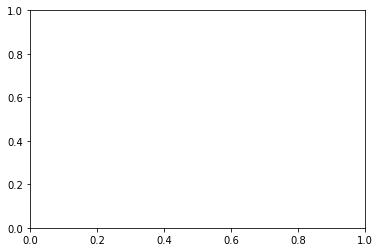

In [ ]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Get the detection methods
dm = data.groupby(['detection_method', 'discovery_year'])['detection_method'].count() 
print(dm)

# Plot detection_method from data against the discovery_year
ax.plot(data["discovery_year"], data["detection_method"])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
#ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Call the show function
plt.show()

Insights:


1.   2016 is the greatest year for planet discovery.
2.   The 'Transit' detection system is the superior (or most prefered) method of detection. 
3.   SWEEPS 4 b & 11 b are two exoplanets discovred in 2006, they currently the furthest known exoplanets from earth at 27,727 light years away
4.   Planets that may be habitable based on my crude assumption about comparisons with Earth
5.   In 2016, t

